In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# Membaca dataset dari file CSV
dataset = pd.read_csv('nprepros_pond1_linear.csv', parse_dates=["created_at"], index_col="created_at")
dataset.head(10)

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
created_at,,,,,,,,
2021-06-19 00:00:00,24.617541,100.0,4.307053,8.430745,0.458420,0.019258,7.11,2.91
2021-06-19 06:00:00,24.652806,100.0,4.050714,8.401315,0.458420,0.020042,7.11,2.91
2021-06-19 12:00:00,26.271899,100.0,4.166278,8.385208,0.457698,0.020757,7.11,2.91
2021-06-19 18:00:00,26.149711,100.0,3.916278,8.399212,0.458774,0.020690,7.11,2.91
2021-06-20 00:00:00,25.686950,100.0,4.377719,8.405993,0.458420,0.019044,7.50,3.85
2021-06-20 06:00:00,25.407630,100.0,4.208872,8.403096,0.458420,0.018522,7.50,3.85
2021-06-20 12:00:00,26.428867,100.0,3.809421,8.375284,0.458420,0.018027,7.50,3.85
2021-06-20 18:00:00,26.223045,100.0,4.077850,8.391571,0.458420,0.018266,7.50,3.85
2021-06-21 00:00:00,25.634234,100.0,4.110925,8.405592,0.458420,0.017092,7.89,4.79


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 465 entries, 2021-06-19 00:00:00 to 2021-10-13 00:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       465 non-null    float64
 1   turbidity  465 non-null    float64
 2   oxygen     465 non-null    float64
 3   ph         465 non-null    float64
 4   ammonia    465 non-null    float64
 5   nitrat     465 non-null    float64
 6   length     465 non-null    float64
 7   weight     465 non-null    float64
dtypes: float64(8)
memory usage: 32.7 KB


In [4]:
dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,24.913365,97.224609,3.810550,7.095375,0.511774,0.069476,22.016796,118.550645
std,0.724524,8.715656,0.396534,0.581090,0.093297,0.040783,7.531430,98.496454
min,24.000000,50.000000,3.027000,6.068580,0.160603,0.011594,7.110000,2.910000
25%,24.390625,100.000000,3.508719,6.668742,0.458420,0.016728,15.960000,33.730000
50%,24.757738,100.000000,3.782313,7.072797,0.499265,0.089213,22.740000,78.050000
75%,25.229167,100.000000,4.136331,7.476671,0.572759,0.104088,28.573846,191.278461
max,27.680147,100.000000,4.955890,8.430745,0.797010,0.144000,33.450000,318.640000


In [5]:
# Menentukan apakah ada nilai kosong dalam dataset
ada_nilai_kosong = dataset.isnull().values.any()

if ada_nilai_kosong:
    print("Dataset memiliki nilai kosong.")
    
    # Mencari lokasi kosong berdasarkan kolom
    kolom_kosong = dataset.columns[dataset.isnull().any()].tolist()
    print("Kolom yang memiliki nilai kosong:", kolom_kosong)
    
    # Mencari lokasi kosong berdasarkan baris
    baris_kosong = dataset[dataset.isnull().any(axis=1)]
    print("Baris yang memiliki nilai kosong:\n", baris_kosong)
else:
    print("Dataset tidak memiliki nilai kosong.")

Dataset tidak memiliki nilai kosong.


<Axes: xlabel='created_at'>

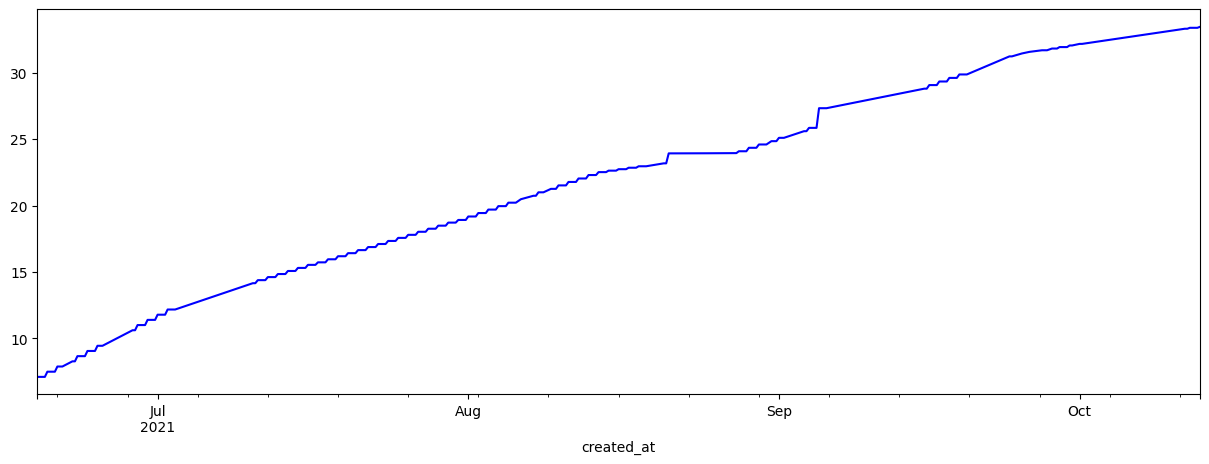

In [6]:
dataset.length.plot(figsize=(15,5), color="b")

<Axes: xlabel='created_at'>

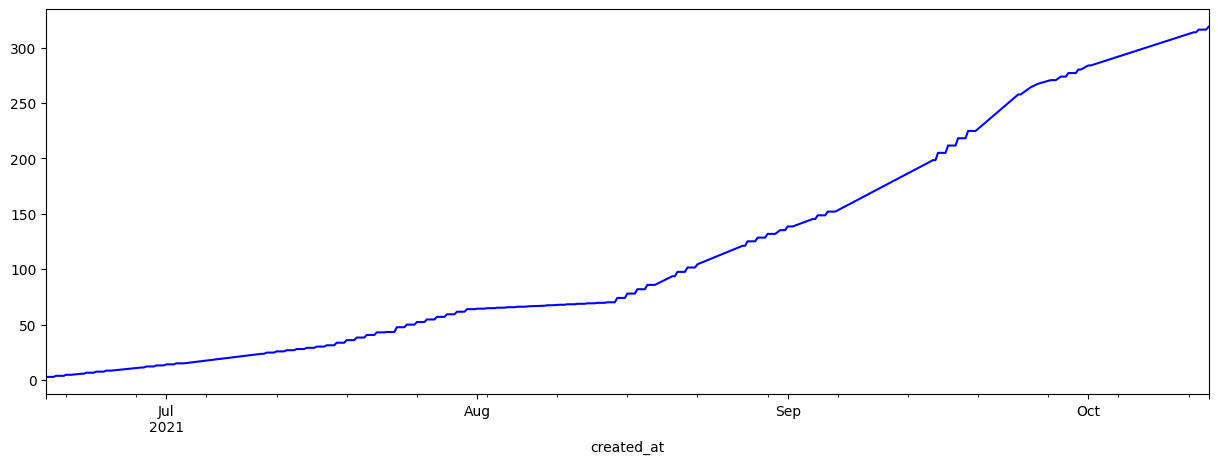

In [7]:
dataset.weight.plot(figsize=(15,5), color="b")

In [8]:
day_dataset = dataset.resample('D', level=0).max()

In [9]:
day_dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,25.146455,97.928717,3.945769,7.100267,0.548647,0.074005,22.120107,120.374570
std,0.706104,7.039450,0.443372,0.591011,0.096779,0.042657,7.587943,100.210021
min,24.036054,53.944444,3.190866,6.068580,0.354900,0.013054,7.110000,2.910000
25%,24.636719,100.000000,3.517422,6.668742,0.472236,0.018184,15.960000,33.730000
50%,25.090278,100.000000,3.921558,7.073983,0.530542,0.096435,22.740000,78.050000
75%,25.422089,100.000000,4.296954,7.488166,0.612260,0.109653,28.686923,194.849231
max,27.680147,100.000000,4.955890,8.430745,0.797010,0.144000,33.450000,318.640000


<Axes: xlabel='created_at'>

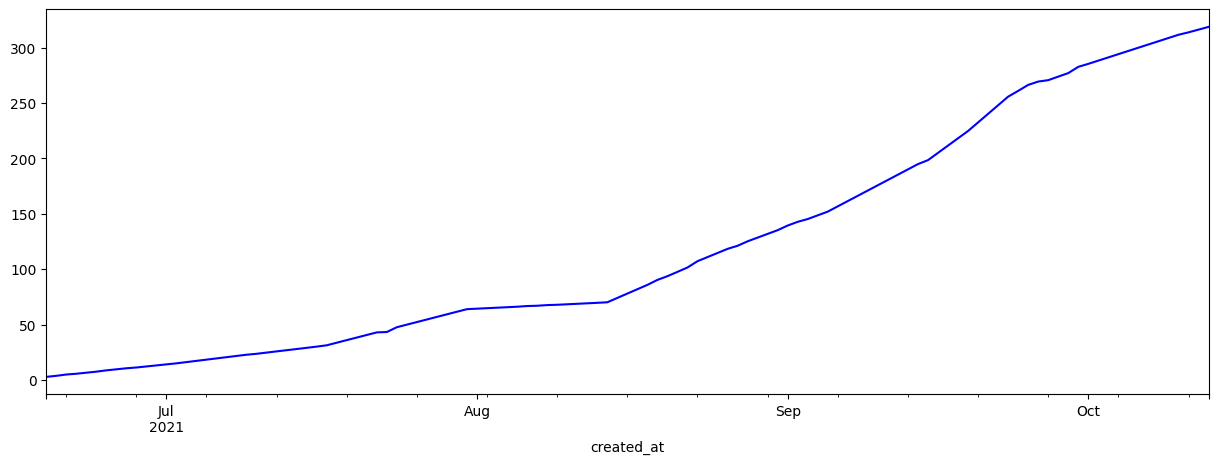

In [10]:
day_dataset.weight.plot(figsize=(15,5), color="b")

In [11]:
# Menghitung pakan harian berdasarkan kolom "length" dan "weight"
# berdasarkan penjelasan jurnal pada dataset 
# Pemberian pakan dilakukan sebanyak 7% dari berat tubuh ikan dalam dua kali pemberian
day_dataset['feed_day'] = (day_dataset['weight']) * 0.07*2

# Menampilkan dataset dengan kolom baru "feed_day"
print(day_dataset)

                 temp  turbidity    oxygen        ph   ammonia    nitrat   
created_at                                                                 
2021-06-19  26.271899      100.0  4.307053  8.430745  0.458774  0.020757  \
2021-06-20  26.428867      100.0  4.377719  8.405993  0.458420  0.019044   
2021-06-21  25.634234      100.0  4.462000  8.405761  0.458420  0.017411   
2021-06-22  25.095409      100.0  4.395750  8.368919  0.458420  0.015512   
2021-06-23  24.745377      100.0  4.307904  8.342940  0.458590  0.015522   
...               ...        ...       ...       ...       ...       ...   
2021-10-09  27.211890      100.0  3.528563  6.123140  0.506527  0.100605   
2021-10-10  27.479466      100.0  3.529956  6.101316  0.510813  0.098596   
2021-10-11  27.680147      100.0  4.110000  6.079492  0.515099  0.104576   
2021-10-12  26.981250      100.0  3.874429  6.068580  0.519386  0.123713   
2021-10-13  26.641447      100.0  4.222000  6.068580  0.519386  0.098700   

           

In [12]:
# Menghitung akumulasi pakan harian (feed_day)
day_dataset['feed_akum'] = day_dataset['feed_day'].cumsum()

# Menampilkan dataset dengan kolom baru "feed_day"
print(day_dataset)

                 temp  turbidity    oxygen        ph   ammonia    nitrat   
created_at                                                                 
2021-06-19  26.271899      100.0  4.307053  8.430745  0.458774  0.020757  \
2021-06-20  26.428867      100.0  4.377719  8.405993  0.458420  0.019044   
2021-06-21  25.634234      100.0  4.462000  8.405761  0.458420  0.017411   
2021-06-22  25.095409      100.0  4.395750  8.368919  0.458420  0.015512   
2021-06-23  24.745377      100.0  4.307904  8.342940  0.458590  0.015522   
...               ...        ...       ...       ...       ...       ...   
2021-10-09  27.211890      100.0  3.528563  6.123140  0.506527  0.100605   
2021-10-10  27.479466      100.0  3.529956  6.101316  0.510813  0.098596   
2021-10-11  27.680147      100.0  4.110000  6.079492  0.515099  0.104576   
2021-10-12  26.981250      100.0  3.874429  6.068580  0.519386  0.123713   
2021-10-13  26.641447      100.0  4.222000  6.068580  0.519386  0.098700   

           

In [13]:
# Create a new column "day" starting from 25
day_dataset['day'] = pd.RangeIndex(start=25, stop=25 + len(day_dataset), step=1)

# Display the dataset with the new "day" column
print(day_dataset)

                 temp  turbidity    oxygen        ph   ammonia    nitrat   
created_at                                                                 
2021-06-19  26.271899      100.0  4.307053  8.430745  0.458774  0.020757  \
2021-06-20  26.428867      100.0  4.377719  8.405993  0.458420  0.019044   
2021-06-21  25.634234      100.0  4.462000  8.405761  0.458420  0.017411   
2021-06-22  25.095409      100.0  4.395750  8.368919  0.458420  0.015512   
2021-06-23  24.745377      100.0  4.307904  8.342940  0.458590  0.015522   
...               ...        ...       ...       ...       ...       ...   
2021-10-09  27.211890      100.0  3.528563  6.123140  0.506527  0.100605   
2021-10-10  27.479466      100.0  3.529956  6.101316  0.510813  0.098596   
2021-10-11  27.680147      100.0  4.110000  6.079492  0.515099  0.104576   
2021-10-12  26.981250      100.0  3.874429  6.068580  0.519386  0.123713   
2021-10-13  26.641447      100.0  4.222000  6.068580  0.519386  0.098700   

           

In [14]:
day_dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,feed_day,feed_akum,day
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,25.146455,97.928717,3.945769,7.100267,0.548647,0.074005,22.120107,120.374570,16.852440,539.983111,83.000000
std,0.706104,7.039450,0.443372,0.591011,0.096779,0.042657,7.587943,100.210021,14.029403,564.498107,33.919021
min,24.036054,53.944444,3.190866,6.068580,0.354900,0.013054,7.110000,2.910000,0.407400,0.407400,25.000000
25%,24.636719,100.000000,3.517422,6.668742,0.472236,0.018184,15.960000,33.730000,4.722200,72.536935,54.000000
50%,25.090278,100.000000,3.921558,7.073983,0.530542,0.096435,22.740000,78.050000,10.927000,316.590909,83.000000
75%,25.422089,100.000000,4.296954,7.488166,0.612260,0.109653,28.686923,194.849231,27.278892,870.294070,112.000000
max,27.680147,100.000000,4.955890,8.430745,0.797010,0.144000,33.450000,318.640000,44.609600,1971.735464,141.000000


In [15]:
# Menentukan rentang nilai maksimum dan minimum untuk setiap fitur
feature_ranges = {
    'temp': (24, 32),
    'turbidity': (50, 100),
    'oxygen': (3, 5),
    'ph': (6, 9),
    'ammonia': (0, 0.8),
    'nitrat': (0, 5)
}

# Menyalin dataset ke dataframe baru
normalized_dataset = day_dataset.copy()

# Melakukan normalisasi pada fitur-fitur yang perlu dinormalisasi
scaler = MinMaxScaler()
for feature, (min_value, max_value) in feature_ranges.items():
    normalized_values = scaler.fit_transform(normalized_dataset[[feature]])
    normalized_dataset[feature] = normalized_values

# Menampilkan dataset yang telah dinormalisasi
print(normalized_dataset)

                temp  turbidity    oxygen        ph   ammonia    nitrat   
created_at                                                                
2021-06-19  0.613553        1.0  0.632392  1.000000  0.234950  0.058824  \
2021-06-20  0.656628        1.0  0.672429  0.989521  0.234150  0.045740   
2021-06-21  0.438567        1.0  0.720179  0.989423  0.234150  0.033273   
2021-06-22  0.290705        1.0  0.682645  0.973827  0.234150  0.018770   
2021-06-23  0.194650        1.0  0.632874  0.962828  0.234535  0.018844   
...              ...        ...       ...       ...       ...       ...   
2021-10-09  0.871502        1.0  0.191327  0.023098  0.342962  0.668602   
2021-10-10  0.944930        1.0  0.192116  0.013859  0.352657  0.653260   
2021-10-11  1.000000        1.0  0.520749  0.004620  0.362352  0.698927   
2021-10-12  0.808211        1.0  0.387282  0.000000  0.372048  0.845076   
2021-10-13  0.714963        1.0  0.584204  0.000000  0.372048  0.654055   

               length   

In [16]:
normalized_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117 entries, 2021-06-19 to 2021-10-13
Freq: D
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       117 non-null    float64
 1   turbidity  117 non-null    float64
 2   oxygen     117 non-null    float64
 3   ph         117 non-null    float64
 4   ammonia    117 non-null    float64
 5   nitrat     117 non-null    float64
 6   length     117 non-null    float64
 7   weight     117 non-null    float64
 8   feed_day   117 non-null    float64
 9   feed_akum  117 non-null    float64
 10  day        117 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 11.0 KB


In [17]:
normalized_dataset.describe()

,temp,turbidity,oxygen,ph,ammonia,nitrat,length,weight,feed_day,feed_akum,day
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.304712,0.955026,0.427701,0.436755,0.438233,0.465463,22.120107,120.374570,16.852440,539.983111,83.000000
std,0.193767,0.152847,0.251199,0.250199,0.218902,0.325764,7.587943,100.210021,14.029403,564.498107,33.919021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.110000,2.910000,0.407400,0.407400,25.000000
25%,0.164832,1.000000,0.185015,0.254073,0.265399,0.039174,15.960000,33.730000,4.722200,72.536935,54.000000
50%,0.289297,1.000000,0.413984,0.425628,0.397283,0.636760,22.740000,78.050000,10.927000,316.590909,83.000000
75%,0.380351,1.000000,0.626670,0.600968,0.582118,0.737700,28.686923,194.849231,27.278892,870.294070,112.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.450000,318.640000,44.609600,1971.735464,141.000000


In [18]:
# Menentukan fitur (X) dan target (y)
features = ['temp', 'turbidity', 'oxygen', 'ph', 'ammonia', 'nitrat','weight']
target = ['length','feed_akum', 'day']
X_lr = normalized_dataset[features]
y_lr = normalized_dataset[target]

# Membuat dan melatih model regresi linear
model_lr = LinearRegression()
model_lr.fit(X_lr, y_lr)

# Menampilkan koefisien dan intercept dari model
print("Koefisien:", model_lr.coef_)
print("Intercept:", model_lr.intercept_)

Koefisien: [[-2.47670009e+00 -6.13721666e-01 -1.10817587e+00 -1.78377425e+01
   6.64079246e-01  3.42761659e+00  2.15832990e-02]
 [ 3.07562606e+02  1.07419109e+02  1.54321847e+02  2.89853526e+00
  -1.33168613e+01 -2.64862063e+00  5.57356156e+00]
 [-3.69847168e+00 -8.18770930e-01 -3.15641459e+00 -5.45600208e+01
   5.99500994e+00  1.89212426e+01  1.50588472e-01]]
Intercept: [  27.24106519 -387.43903626   80.52689703]


In [19]:
# Menentukan fitur yang akan digunakan untuk prediksi
new_data = {
    'temp': 26,
    'turbidity': 55,
    'oxygen': 2,
    'ph': 6,
    'ammonia': 0.2,
    'nitrat': 2,
    'weight': 100
}

# Menyalin data baru ke dataframe baru
new_data_df = pd.DataFrame([new_data])

# Melakukan normalisasi pada fitur-fitur yang perlu dinormalisasi
for feature, (min_value, max_value) in feature_ranges.items():
    normalized_values = (new_data_df[feature] - min_value) / (max_value - min_value)
    new_data_df[feature] = normalized_values

# Melakukan prediksi menggunakan model regresi linear
predictions = model_lr.predict(new_data_df)

# Menampilkan hasil prediksi
print("Prediksi length, feed_akum, dan day:", predictions)

Prediksi length, feed_akum, dan day: [[ 30.81000228 176.00009458 105.22470605]]


In [20]:
# Menyimpan model regresi linear dalam format pickle
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

In [21]:
# Hasil dengan model linear regresi Scikit Learn
# iotpond 1
# hasilnya untuk weight 100 
# [[ 30.81000228 176.00009458 105.22470605]]

# iotpond 2
# hasilnya untuk weight 100 
# [[  27.31881401 -202.05112917   90.32855218]]

# iotpond 3
# hasilnya untuk weight 100 
# [[ 21.21948755 498.96011794  75.31138587]]


# Hasil dengan model NN biasa
# iotpond 1
# hasilnya untuk weight 100 
# [[ 19.327662 415.77408   70.610435]]
# [[ 18.756563 410.4815    72.6245  ]]

# iotpond 2
# hasilnya untuk weight 100 
# [[ 18.31957  453.24756   73.135056]]

# iotpond 3
# hasilnya untuk weight 100 
# [[ 18.224924 402.16708   67.430176]]


# Hasil dengan model leaky relu
# iotpond 1
# hasilnya untuk weight 100 
# [[ 18.300047 411.77832   71.16209 ]]

# iotpond 2
# hasilnya untuk weight 100 
# [[ 18.104107 461.60992   67.24234 ]]

# iotpond 3
# hasilnya untuk weight 100 
# [[ 17.372635 395.72516   67.28603 ]]

